<a href="https://colab.research.google.com/github/WahajSayyed/Machine-Learning-Projects/blob/main/Multi_class_Classifier%7C_Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classifier| Rock-Paper-Scissor

In [4]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2024-01-19 19:54:21--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.2’

rps.zip.2           100%[===================>] 191.38M  22.2MB/s    in 9.6s    

2024-01-19 19:54:31 (20.0 MB/s) - ‘rps.zip.2’ saved [200682221/200682221]

--2024-01-19 19:54:31--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘r

In [5]:
import zipfile

local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('./tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('./tmp/rps-test')
zip_ref.close()

In [6]:
import os
os.listdir('./tmp/rps-train/rps')

train_dir = os.path.join('./tmp/rps-train/rps')
rock_dir = os.path.join(train_dir, 'rock')
paper_dir = os.path.join(train_dir, 'paper')
scissors_dir = os.path.join(train_dir, 'scissors')

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


['rock02-104.png', 'rock01-064.png', 'rock05ck01-040.png', 'rock02-008.png', 'rock02-091.png', 'rock06ck02-032.png', 'rock07-k03-037.png', 'rock06ck02-035.png', 'rock04-046.png', 'rock07-k03-111.png']
['paper03-035.png', 'paper07-038.png', 'paper04-092.png', 'paper04-032.png', 'paper01-040.png', 'paper04-029.png', 'paper04-052.png', 'paper02-048.png', 'paper06-086.png', 'paper01-054.png']
['testscissors01-033.png', 'testscissors03-018.png', 'scissors02-058.png', 'scissors03-030.png', 'testscissors03-086.png', 'testscissors01-090.png', 'testscissors02-034.png', 'testscissors02-094.png', 'testscissors01-003.png', 'testscissors03-022.png']


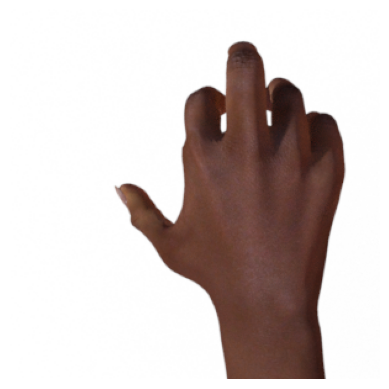

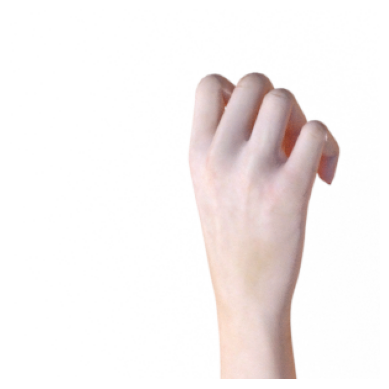

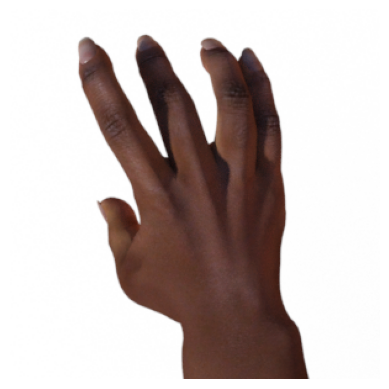

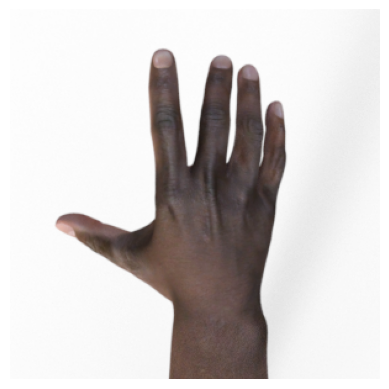

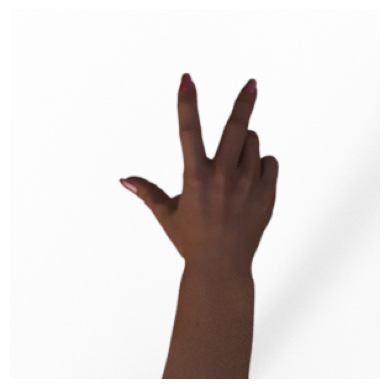

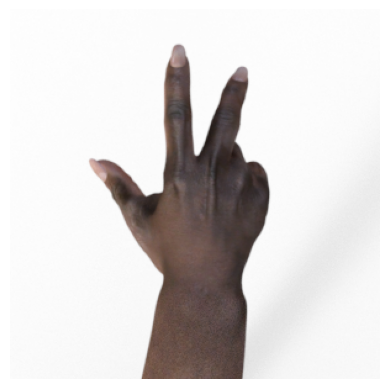

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

rock_list = [ os.path.join(rock_dir, fname) for fname in os.listdir(rock_dir)[pic_index-2:pic_index]]
paper_list = [ os.path.join(paper_dir, fname) for fname in os.listdir(paper_dir)[pic_index-2:pic_index]]
scissors_list = [ os.path.join(scissors_dir, fname) for fname in os.listdir(scissors_dir)[pic_index-2:pic_index]]

for _, img_path in enumerate(rock_list+paper_list+scissors_list):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential(
    [
        Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Prepare the ImageDataGenerator


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=126,
                                                    class_mode='categorical',
                                                    target_size = (150,150))

test_generator = test_datagen.flow_from_directory('tmp/rps-test/rps-test-set',
                                                  batch_size=126,
                                                  target_size= (150,150),
                                                  class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# Train the model and evaluate the results


In [11]:
history = model.fit(train_generator,
                    steps_per_epoch=20,
                    validation_data=test_generator,
                    validation_steps=3,
                    epochs=25,
                    verbose=1)


Epoch 1/25
20/20 [==============================] - 33s 1s/step - loss: 1.1259 - accuracy: 0.3512 - val_loss: 1.0959 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 27s 1s/step - loss: 1.0965 - accuracy: 0.3774 - val_loss: 1.0774 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 31s 1s/step - loss: 1.0487 - accuracy: 0.4643 - val_loss: 0.8576 - val_accuracy: 0.6102
Epoch 4/25
20/20 [==============================] - 22s 1s/step - loss: 0.9675 - accuracy: 0.5385 - val_loss: 0.8319 - val_accuracy: 0.6452
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.8138 - accuracy: 0.6238 - val_loss: 0.4161 - val_accuracy: 0.8683
Epoch 6/25
20/20 [==============================] - 22s 1s/step - loss: 0.7231 - accuracy: 0.6821 - val_loss: 0.5864 - val_accuracy: 0.6210
Epoch 7/25
20/20 [==============================] - 27s 1s/step - loss: 0.6131 - accuracy: 0.7123 - val_loss: 0.3905 - val_accuracy: 0.9382
Epoch 8/25
20/20 [==

<function matplotlib.pyplot.show(close=None, block=None)>

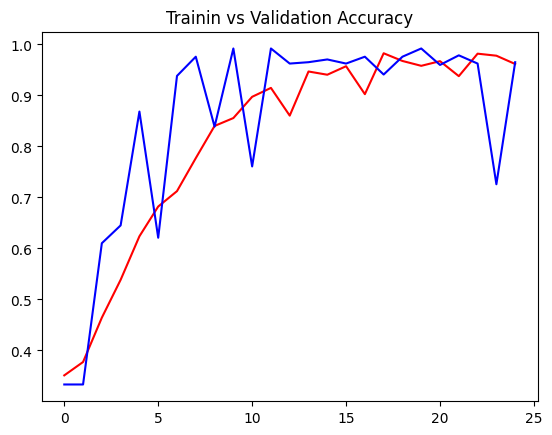

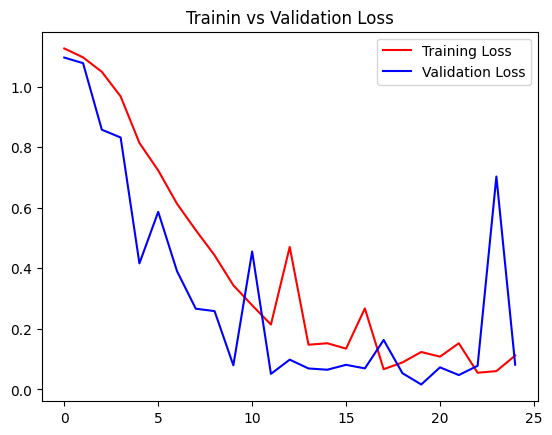

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Trainin vs Validation Accuracy')
plt.figure()
plt.legend()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Trainin vs Validation Loss')
plt.legend()

plt.show

# Model Prediction

In [16]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(path, target_size=(150,150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper1.png to paper1 (2).png
Saving rock2.png to rock2.png
Saving scissors7.png to scissors7.png
1/1 [==============================] - 0s 18ms/step
paper1 (2).png
[[1. 0. 0.]]
1/1 [==============================] - 0s 18ms/step
rock2.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 17ms/step
scissors7.png
[[0. 0. 1.]]
